In [24]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [10]:
df = pd.read_excel("Airlines+Data.xlsx")

In [11]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [12]:
df = df.set_index('Month')
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [14]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [15]:
y = df['Passengers'].resample('MS').mean()

In [27]:
df['Passengers'].min(), df['Passengers'].max()

(104, 413)

In [28]:
df.isnull().sum()

Passengers    0
dtype: int64

In [29]:
df.shape

(96, 1)

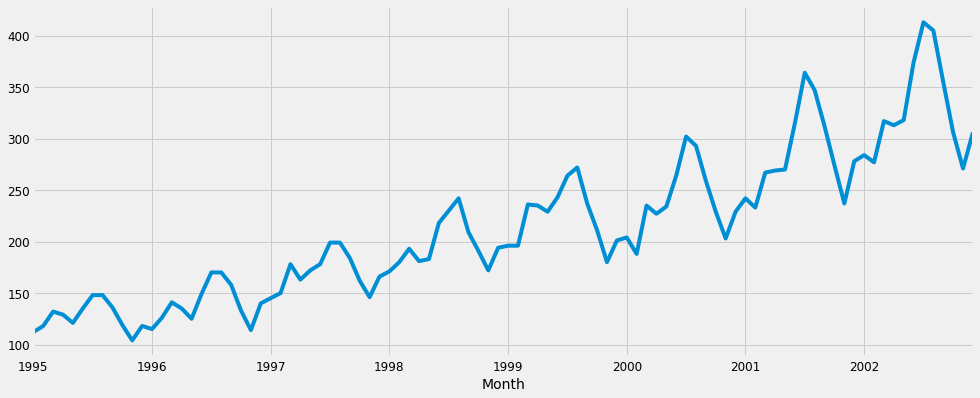

In [17]:
y.plot(figsize=(15, 6))
plt.show()

In [34]:
y['1998']
#passenger data for year 1998

Month
1998-01-01    171.0
1998-02-01    180.0
1998-03-01    193.0
1998-04-01    181.0
1998-05-01    183.0
1998-06-01    218.0
1998-07-01    230.0
1998-08-01    242.0
1998-09-01    209.0
1998-10-01    191.0
1998-11-01    172.0
1998-12-01    194.0
Freq: MS, Name: Passengers, dtype: float64

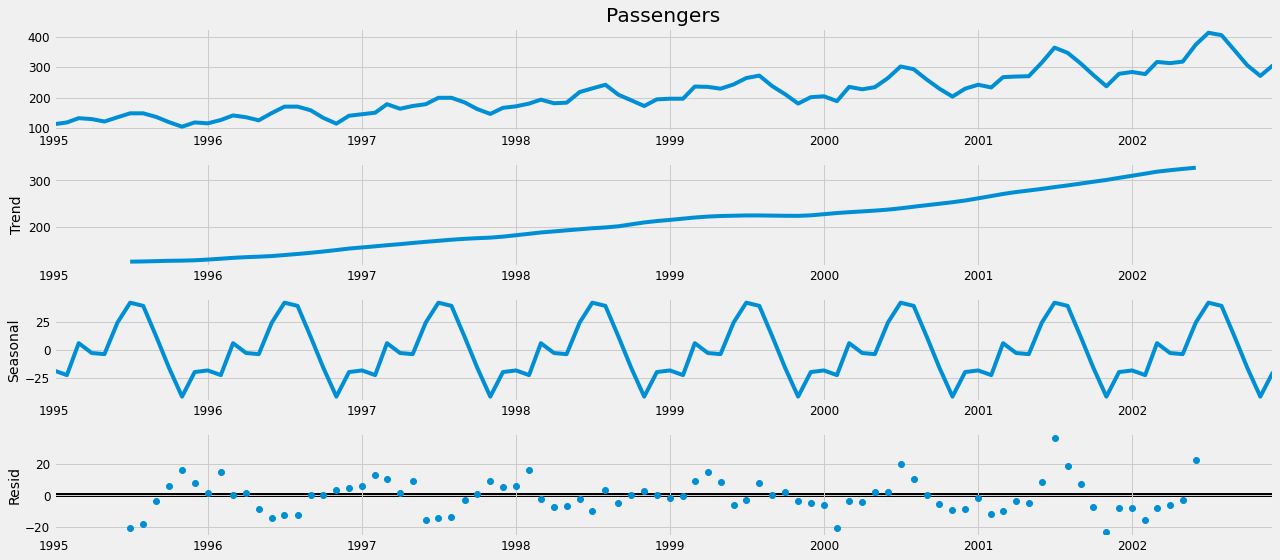

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA

In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1301.7158787856208
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1069.8681142508353
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:817.6023833571672
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:678.6537300240175
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:677.5531509102017
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:647.7939382090486
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:654.0347495415086
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:606.5519478528233
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1167.891276995336
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:953.0565437831401
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:738.7752929519518
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:625.053380667214
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:650.1573814003515
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:639.4389006193819
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:626.5309634731706
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:626.9663929708577
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:861.8673044488422
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:708.1376561788121
ARIMA(0, 

##### The above output suggests that SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC value of 519.27. Therefore we should consider this to be optimal option.

## Fitting the ARIMA model

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2364      0.113     -2.097      0.036      -0.457      -0.015
ma.S.L12      -0.2088      0.115     -1.822      0.068      -0.433       0.016
sigma2        99.5395     17.872      5.569      0.000      64.510     134.569


##### We should always run model diagnostics to investigate any unusual behavior

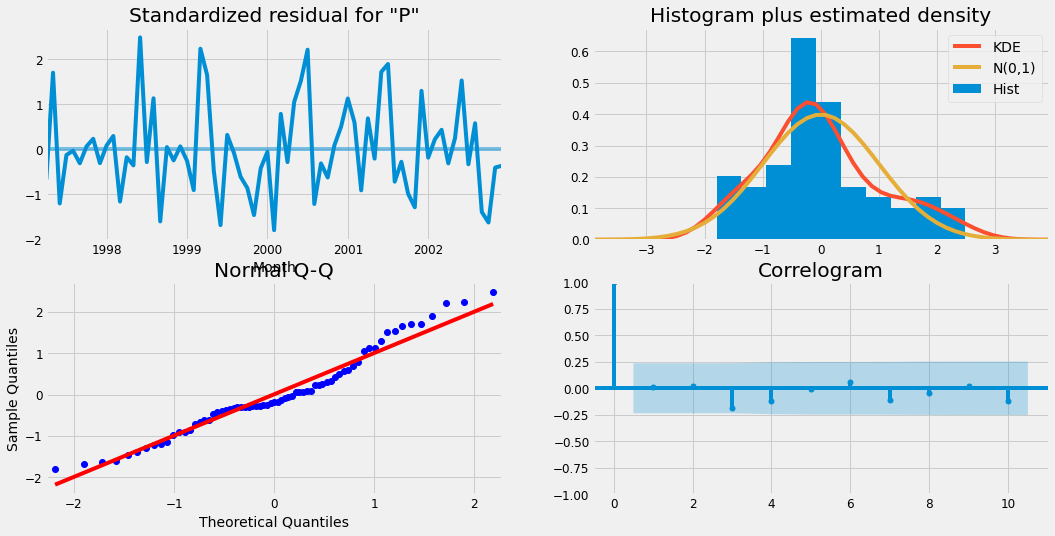

In [35]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

##### It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed

## Validating forecasts

##### To help us understand the accuracy of our forecasts, we compare passenger data to real data of the time series, and we set forecasts to start at 2001–01–01 to the end of the data

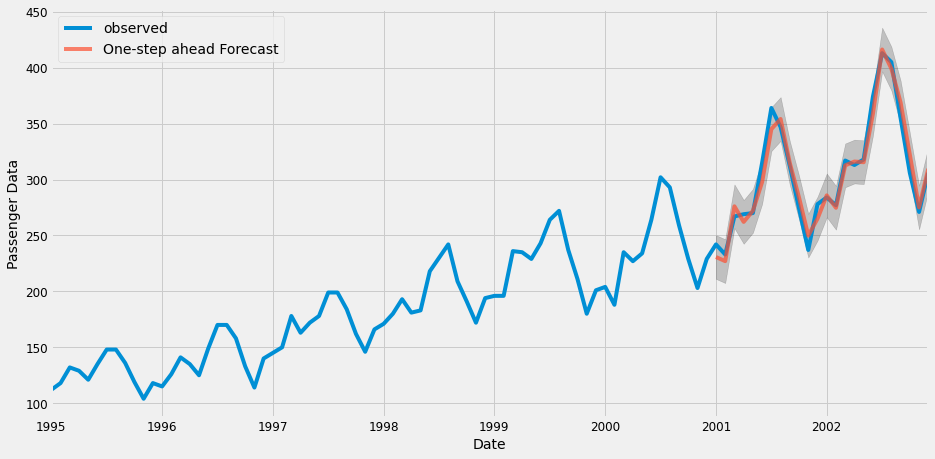

In [37]:
pred = results.get_prediction(start=pd.to_datetime('2001-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1995':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Passenger Data')
plt.legend()
plt.show()

#### The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [39]:
y_forecasted = pred.predicted_mean
y_truth = y['2001-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 93.37
The Root Mean Squared Error of our forecasts is 9.66


## Producing and visualizing forecasts

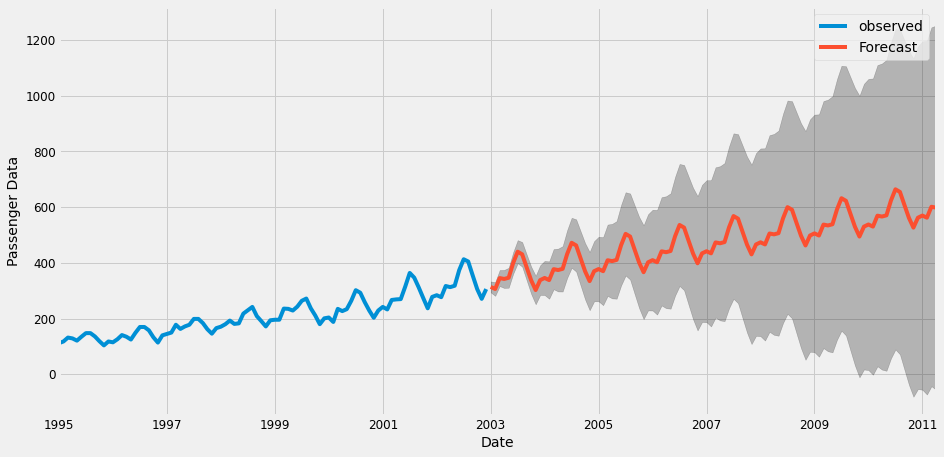

In [40]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Passenger Data')
plt.legend()
plt.show()